# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [99]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

data = sns.load_dataset("mpg")

# Drop the rows with missing values
data.dropna(how='all')

# Drop the "name" column
data.drop(columns=["name"], inplace=True)

# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2
data['origin'] = data['origin'].factorize()[0]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [100]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE

data = data[data['horsepower'].notnull()]

X = data[['cylinders', 'displacement', 'weight',  'horsepower', 'acceleration',	'model_year',	'origin']]
#X = data.select_dtypes(include=np.number)
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42)

print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 392
The length of the train dataset is   : 313
The length of the test dataset is    : 79


In [101]:
# Fit a decision tree
# INSERT CODE HERE


modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [102]:
# Predict on the xtest set
# INSERT CODE HERE

modelDTR.predict(X_test)

array([23. , 19. , 31. , 33. , 27.9, 28. , 11. , 31.5, 18. , 31. , 15. ,
       17. , 17.5, 28. , 17. , 27. , 18. , 32.4, 36.4, 37. , 23.8, 36. ,
       31. , 17. , 31. , 28. , 18. , 18. , 26. , 25. , 16. , 20.2, 23.9,
       28. , 14. , 31. ,  9. , 23. , 14. , 13. , 14. , 28. , 34. , 25. ,
       16. , 11. , 22. , 44.3, 25. , 33. , 14. , 22. , 22. , 37. , 38. ,
       16. , 18. , 19. , 24. , 22. , 12. , 22. , 28.8, 22. , 23.9, 26. ,
       25.5, 33. , 23.9, 14. , 25. , 14. , 23.8, 19. , 20.8, 24. , 13. ,
       18. , 24. ])

In [103]:
# Print out the R2 score.
# INSERT CODE HERE

modelDTR.score(X_train, y_train), modelDTR.score(X_test, y_test)

(1.0, 0.7475079445783801)

In [104]:
# Print each feature with importance %
# INSERT CODE HERE

modelDTR.feature_importances_

array([0.00274574, 0.63160233, 0.06446456, 0.17013862, 0.02472841,
       0.10261379, 0.00370655])

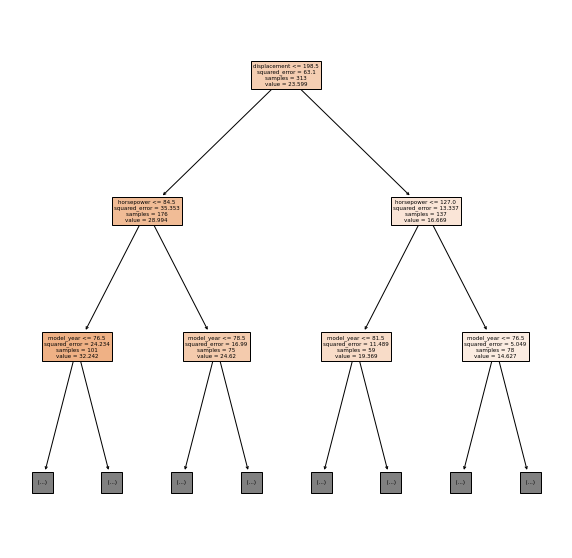

In [105]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

plt.figure(figsize = (10,10))
plot_tree( modelDTR,
          filled = True, 
          feature_names=X_train.columns,
          max_depth = 2 )
plt.show()

## Classification Trees

In [85]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# INSERT CODE HERE
data.dropna(inplace=True)
data['species'] = data['species'].factorize()[0]
data['island'] = data['island'].factorize()[0]
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [86]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE
y = data['sex']
X = data[['species',
          'island',
          'bill_length_mm',
          'bill_depth_mm',
       'flipper_length_mm',
       'body_mass_g',
       ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 42, shuffle = True)

print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 333
The length of the train dataset is   : 266
The length of the test dataset is    : 67


In [87]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE

modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)


DecisionTreeClassifier()

In [88]:
# Print the predictions on the test set
# INSERT CODE HERE

modelDTC.predict(X_test)

array(['Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [89]:
# Print the accuracy score for the predictions
# INSERT CODE HERE

modelDTC.score(X_train, y_train), modelDTC.score(X_test, y_test)

(1.0, 0.8656716417910447)

In [90]:
# Print each feature with importance %
# INSERT CODE HERE

modelDTC.feature_importances_

array([0.00752944, 0.        , 0.06872814, 0.4880512 , 0.03538836,
       0.40030287])

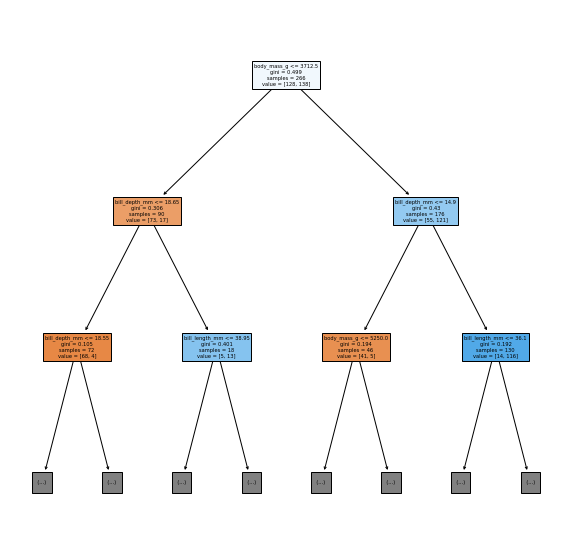

In [93]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

from sklearn.tree import plot_tree

plt.figure(figsize = (10,10))
plot_tree(modelDTC,
          filled = True, 
          feature_names=X_train.columns,
          max_depth = 2 )
plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [94]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies = []
for i in range(1, 11):
  # INSERT CODE HERE
  modelDTC = DecisionTreeClassifier(max_depth = i)
  modelDTC.fit(X_train, y_train)
  accuracy = modelDTC.score(X_test, y_test)
  list_of_accuracies.append(accuracy)
print(f'{list_of_accuracies}')

[0.7014925373134329, 0.8208955223880597, 0.835820895522388, 0.8656716417910447, 0.8656716417910447, 0.8208955223880597, 0.8507462686567164, 0.835820895522388, 0.835820895522388, 0.8656716417910447]


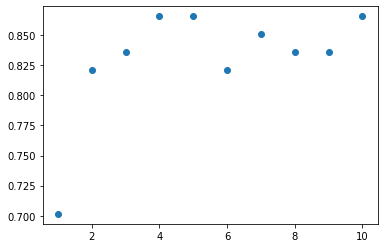

In [95]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE

plt.scatter(range(1, 11), list_of_accuracies)